## 라이브러리 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
df = pd.read_csv('/home/lee/sources/dataset/titanic/train.csv')

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 891명의 탑승자의 대한 정보가 있지만 Age,Cabin,Embarked에 결측치가 있기 때문에 처리가 필요
### 
#### 'PassengerId'  = 탑승자 데이터 일련번호
#### 'Survived'     = 생존 여부 ,0 = 죽음 ,1 = 생존
#### 'Pclass'       = 티켓의 선실 등급 1,2,3 순서대로 일,이,삼등석
#### 'Name'         = 탑승자의 이름
#### 'Sex'          = 탑승자의 성별
#### 'Age'          = 탑승자의 나이
#### 'SibSp'        = 같이 탑승한 형제자매 또는 배우자 인원수
#### 'Parch'        = 같이 탑승한 부모 또는 자녀 인원수
#### 'Ticket'       = 티켓번호
#### 'Fare'         = 요금
#### 'Cabin'        = 선실 번호
#### 'Embarked      = 중간 정착항구 C = Cherbourg Q = Queenstown S = Southampton

### 결측치 처리

In [23]:
df.isna().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

#### Cabin 컬럼이 결측이 가장 많지만 타겟인 생존 컬럼에 영향을 미치는 지 확인

In [26]:
len(df['Cabin'].unique())

148

In [29]:
df['Cabin'].unique()[:20]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12'], dtype=object)

In [30]:
df['Cabin'] = df['Cabin'].str[0]

In [35]:
df['Cabin'] = df['Cabin'].fillna('M')

In [36]:
df['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot: xlabel='Cabin', ylabel='Survived'>

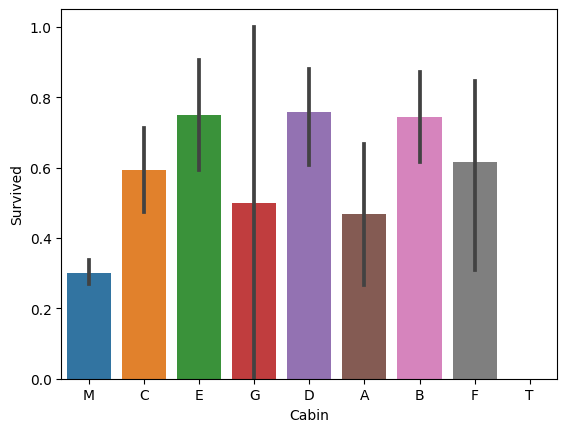

In [37]:
sns.barplot(x='Cabin',y='Survived',data=df)

### 결측의 처리를 위해 채운 'M'이였지만 M 선실번호 즉 결측이였던 탑승자들은 생존율이 가장 낮은 편이므로 
### M의 선실을 사용한 탑승객은 생존율이 낮다고 볼 수 있다.